This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


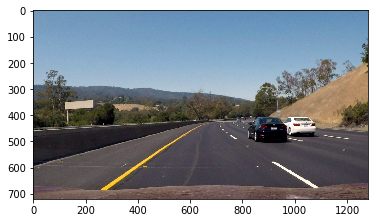

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
directory = 'test_images/'
os.listdir(directory)
#image = mpimg.imread('test_images/solidWhiteCurve.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
#image = mpimg.imread('test_images/solidYellowCurve.jpg')
#image = mpimg.imread('test_images/solidYellowCurve2.jpg')
#image = mpimg.imread('test_images/solidYellowLeft.jpg')
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
image = mpimg.imread('aaa/frame0.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [2]:
#image = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
#cv2.imwrite('test_images_results/Test_gray.jpg', image)

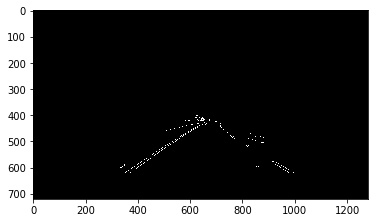

In [54]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(masked_edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(470, 315), (490, 315), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(200,imshape[0]-100),(620, 400), (630,400), (imshape[1],imshape[0]-100)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(masked_edges, mask)

# Display the image
plt.imshow(masked_edges, cmap='Greys_r')

In [46]:
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
#img_dila = cv2.dilate(masked_edges, kernel, iterations=1) 
#img_erosion = cv2.erode(img_dila, kernel, iterations=1) 
#plt.imshow(img_erosion, cmap='Greys_r')

#cv2.fillPoly(gray, masked_edges, (255,0,0))

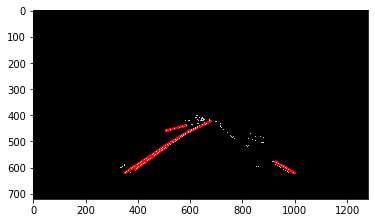

In [56]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = 1*np.pi/180
threshold = 15
min_line_length = 60
max_line_gap = 10
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

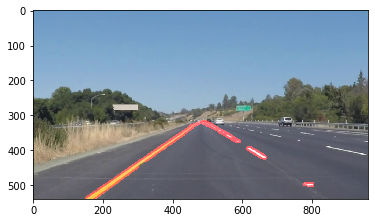

In [7]:
ResultImage = cv2.addWeighted(image, 1, line_image, 1, 0) 
plt.imshow(ResultImage)
#plt.savefig('test_images_results/ResultImage.jpg')

In [8]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)
image = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
ResultImage = cv2.addWeighted(image, 1, line_image, 1, 0) 
cv2.imshow('image',ResultImage)
cv2.waitKey(0)
cv2.imwrite('test_images_results/Test_gray.jpg', ResultImage)

True

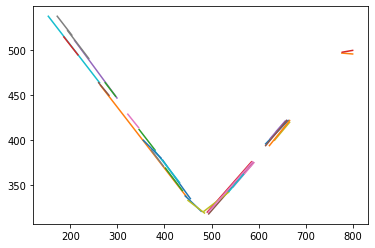

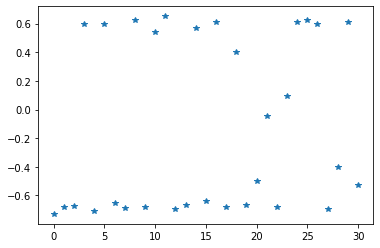

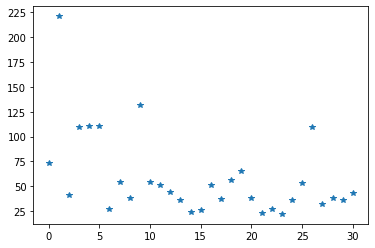

In [11]:
#a = np.array([1, 2, 3, 4])
i = 0
#a = [0,0] * len(lines)
a = [[0] * len(lines), [0] * len(lines)]
for pltline in lines:
    for x1,y1,x2,y2 in pltline:
        plt.plot([x1, x2], [y1, y2])
        a[0][i] = ((y2-y1)/(x2-x1))
        a[1][i] = ((y2-y1)**2 + (x2-x1)**2)**(1/2)
        i = i + 1
plt.show()
plt.plot(a[0],'*')
plt.show()
plt.plot(a[1],'*')

In [ ]:
aPos = [i for i in a[0] if i > 0]
aPosLen = [a[1][a[0].index(i)] for i in a[0] if i > 0]
aNeg = [i for i in a[0] if i <= 0]
aNegLen = [a[1][a[0].index(i)] for i in a[0] if i <= 0]
aPosAve = sum(aPos)/len(aPos)
aNegAve = sum(aNeg)/len(aNeg)
aAveAbs = sum(list(map(abs, a[0])))/len(a[0])
print(aAveAbs)
print(aNegAve)
print(aPosAve)
aX = [i for i in a[0] if abs(abs(i)-aAveAbs)<0.25]
print(aX)
print("lengths: ",len(a[0]) , len(aX))
aY = [i for i in a[0] if abs(abs(i)-aAveAbs)<0.25]

In [ ]:
aPosX = [i for i in aPos if abs(abs(i)-aAveAbs)<0.1]
print("lengths: ",len(aPos) , len(aPosX))
#aNegX = [i for i in aNeg if abs(abs(i)-aAveAbs)<0.1]
aNegX = [i for i in aNeg if i<aNegAve]
print("lengths: ",len(aNeg) , len(aNegX))

In [ ]:
aNegX = [i for i in aNeg if abs(abs(i)-aAveAbs)<0.2]
aNegLenX = [a[1][a[0].index(i)] for i in aNegX]
AveNegRate = [(i-min(aNegLenX))/(max(aNegLenX)-min(aNegLenX)) for i in aNegLenX]
aNegXRated = [i*aNegX[AveNegRate.index(i)] for i in AveNegRate]
SlopeNeg = sum(aNegXRated)/sum(AveNegRate)
#
aPosX = [i for i in aPos if abs(abs(i)-aAveAbs)<0.2]
aPosLenX = [a[1][a[0].index(i)] for i in aPosX]
AvePosRate = [(i-min(aPosLenX))/(max(aPosLenX)-min(aPosLenX)) for i in aPosLenX]
aPosXRated = [i*aPosX[AvePosRate.index(i)] for i in AvePosRate]
SlopePos = sum(aPosXRated)/sum(AvePosRate)
#
print(SlopeNeg)
print(SlopePos)

In [ ]:
NegLines = [lines[a[0].index(i)] for i in aNegX]
i = 0
xyNeg = [[0] * len(NegLines), [0] * len(NegLines), [0] * len(NegLines), [0] * len(NegLines)]
for pltline in NegLines:
    for x1,y1,x2,y2 in pltline:
        xyNeg[0][i] = x1
        xyNeg[1][i] = x2
        xyNeg[2][i] = y1
        xyNeg[3][i] = y2
        i = i + 1

x1Neg = sum(xyNeg[0])/len(xyNeg[0])
x2Neg = sum(xyNeg[1])/len(xyNeg[0])
y1Neg = sum(xyNeg[2])/len(xyNeg[0])
y2Neg = sum(xyNeg[3])/len(xyNeg[0])
print(x1Neg)
print(x2Neg)
print(y1Neg)
print(y2Neg)
plt.plot([x1Neg, x2Neg],[y1Neg, y2Neg])
plt.show()
#
PosLines = [lines[a[0].index(i)] for i in aPosX]
i = 0
xyPos = [[0] * len(PosLines), [0] * len(PosLines), [0] * len(PosLines), [0] * len(PosLines)]
for pltline in PosLines:
    for x1,y1,x2,y2 in pltline:
        xyPos[0][i] = x1
        xyPos[1][i] = x2
        xyPos[2][i] = y1
        xyPos[3][i] = y2
        i = i + 1

x1Pos = sum(xyPos[0])/len(xyPos[0])
x2Pos = sum(xyPos[1])/len(xyPos[0])
y1Pos = sum(xyPos[2])/len(xyPos[0])
y2Pos = sum(xyPos[3])/len(xyPos[0])
print(x1Pos)
print(x2Pos)
print(y1Pos)
print(y2Pos)
plt.plot([x1Pos, x2Pos],[y1Pos, y2Pos])

In [ ]:
inpsNeg = list(range(min(xyNeg[0]), max(xyNeg[1])))
youtNeg = [SlopeNeg*(i-x1Neg) + y1Neg for i in inpsNeg]
inpsPos= list(range(min(xyPos[0]), max(xyPos[1])))
youtPos = [SlopePos*(i-x1Pos) + y1Pos for i in inpsPos]
plt.plot(inpsNeg,youtNeg)
plt.plot(inpsPos,youtPos)

In [ ]:
line_imagex = np.copy(image)*0 #creating a blank to draw lines on
LinesNewx = [min(inpsNeg),max(inpsNeg),max(youtNeg),min(youtNeg)]
LinesNewx = [int(i) for i in LinesNewx]
cv2.line(line_imagex,(LinesNewx[0],LinesNewx[2]),(LinesNewx[1],LinesNewx[3]),(255,0,0),10)
LinesNewx = [min(inpsPos),max(inpsPos),min(youtPos),max(youtPos)]
LinesNewx = [int(i) for i in LinesNewx]
cv2.line(line_imagex,(LinesNewx[0],LinesNewx[2]),(LinesNewx[1],LinesNewx[3]),(255,0,0),10)
plt.imshow(line_imagex)

In [ ]:
combox = cv2.addWeighted(color_edges, 0.8, line_imagex, 1, 0) 
plt.imshow(combox)

#imagex = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
#ResultImagex = cv2.addWeighted(imagex, 1, line_imagex, 1, 0) 
#cv2.imshow('image',ResultImagex)
#cv2.waitKey(0)

In [ ]:
max(aPosLen)
MaxLenIndPos = a[1].index(max(aPosLen))
#MaxLenSlope = a[0][MaxLenInd]
max(aNegLen)
MaxLenIndNeg = a[1].index(max(aNegLen))
#MaxLenSlope = a[0][MaxLenInd]
for x1,y1,x2,y2 in lines[MaxLenIndPos]: plt.plot([x1, x2], [y1, y2])
for x1,y1,x2,y2 in lines[MaxLenIndNeg]: plt.plot([x1, x2], [y1, y2])
#a[0][a[1].index((max(aPosLen)))]
aX = [i for i in a[0] if abs(abs(i)-aAveAbs)<0.01]
#lines[a.index(aX[0])]
#plt.plot(lines[a.index(aX[0])])
#plt.plot([743, 776], [467, 486])
len(aX)
#for pltInd in len(aX):
#    for x1,y1,x2,y2 in lines[a.index(pltInd)]:
#        plt.plot([x1, x2], [y1, y2])
for pltInd in aX:
    for x1,y1,x2,y2 in lines[a[0].index(pltInd)]:
        plt.plot([x1, x2], [y1, y2])

In [ ]:
for pltInd in aNegX:
    for x1,y1,x2,y2 in lines[a[0].index(pltInd)]:
        plt.plot([x1, x2], [y1, y2])

In [ ]:
for pltInd in aPos:
    for x1,y1,x2,y2 in lines[a[0].index(pltInd)]:
        plt.plot([x1, x2], [y1, y2])

In [ ]:
i = 0
xyNeg = [[0] * len(aNegX), [0] * len(aNegX), [0] * len(aNegX), [0] * len(aNegX)]
for pltline in lines:
    for x1,y1,x2,y2 in pltline:
        SlopeTmp = ((y2-y1)/(x2-x1))
        #if SlopeTmp < 0 and abs(abs(SlopeTmp)-aAveAbs)<0.25:
        if SlopeTmp < 0 and SlopeTmp<aNegAve:
            xyNeg[0][i] = x1
            xyNeg[1][i] = x2
            xyNeg[2][i] = y1
            xyNeg[3][i] = y2
            i = i + 1
#plt.plot(xy[0])
x1Neg = sum(xyNeg[0])/len(xyNeg[0])
x2Neg = sum(xyNeg[1])/len(xyNeg[0])
y1Neg = sum(xyNeg[2])/len(xyNeg[0])
y2Neg = sum(xyNeg[3])/len(xyNeg[0])
print(x1Neg)
print(x2Neg)
print(y1Neg)
print(y2Neg)
plt.plot([x1Neg, x2Neg],[y1Neg, y2Neg])
#plt.plot([min(xyNeg[0]),max(xyNeg[1])],[max(xyNeg[3]),min(xyNeg[2])])
print((y2Neg-y1Neg)/(x2Neg-x1Neg))
print(a[0][0])

In [ ]:
mslope = sum(aNeg)/len(aNeg)
mslope2 = -0.77

In [ ]:
inpsNeg = list(range(min(xyNeg[0]), max(xyNeg[1])))
idx = 0
youtNeg = [0]*len(inpsNeg)
youtNegf = [0]*len(inpsNeg)
youtNegff = [0]*len(inpsNeg)
for i in inpsNeg:
    youtNeg[idx] = ((y2Neg-y1Neg)/(x2Neg-x1Neg))*(i-x1Neg) + y1Neg
    youtNegf[idx] = mslope*(i-x1Neg) + y1Neg
    youtNegff[idx] = mslope2*(i-x1Neg) + y1Neg
    idx = idx + 1
plt.plot(inpsNeg,youtNeg)
plt.plot(inpsNeg,youtNegf)
plt.plot(inpsNeg,youtNegff)
plt.plot([min(xyNeg[0]),max(xyNeg[1])],[max(xyNeg[3]),min(xyNeg[2])])

#for x1,y1,x2,y2 in lines[0]:     plt.plot([x1, x2], [y1, y2])



In [ ]:
i = 0
xyPos = [[0] * len(aPosX), [0] * len(aPosX), [0] * len(aPosX), [0] * len(aPosX)]
for pltline in lines:
    for x1,y1,x2,y2 in pltline:
        SlopeTmp = ((y2-y1)/(x2-x1))
        if SlopeTmp > 0 and abs(abs(SlopeTmp)-aAveAbs)<0.25:
            xyPos[0][i] = x1
            xyPos[1][i] = x2
            xyPos[2][i] = y1
            xyPos[3][i] = y2
            i = i + 1
#plt.plot(xy[0])
x1Pos = sum(xyPos[0])/len(xyPos[0])
x2Pos = sum(xyPos[1])/len(xyPos[0])
y1Pos = sum(xyPos[2])/len(xyPos[0])
y2Pos = sum(xyPos[3])/len(xyPos[0])

inpsPos = list(range(min(xyPos[0]), max(xyPos[1])))
idx = 0
youtPos = [0]*len(inpsPos)
for i in inpsPos:
    youtPos[idx] = ((y2Pos-y1Pos)/(x2Pos-x1Pos))*(i-x1Pos) + y1Pos
    idx = idx + 1
plt.plot(inpsPos,youtPos)
plt.plot([min(xyPos[0]),max(xyPos[1])],[min(xyPos[2]),max(xyPos[3])])
print((y2Pos-y1Pos)/(x2Pos-x1Pos))
asf = (max(xyPos[3])-min(xyPos[2]))/(min(xyPos[0])-max(xyPos[1]))
print(asf)

In [ ]:
linesN = lines[[0]]
linesN[0] = [min(inpsNeg),max(inpsNeg),max(youtNeg),min(youtNeg)]
print(linesN[0])
print(lines[0])

In [ ]:
line_imagex = np.copy(image)*0 #creating a blank to draw lines on
LinesNewx = [min(inpsNeg),max(inpsNeg),max(youtNeg),min(youtNeg)]
LinesNewx = [int(i) for i in LinesNewx]
cv2.line(line_imagex,(LinesNewx[0],LinesNewx[2]),(LinesNewx[1],LinesNewx[3]),(255,0,0),10)
LinesNewx = [min(inpsPos),max(inpsPos),min(youtPos),max(youtPos)]
LinesNewx = [int(i) for i in LinesNewx]
cv2.line(line_imagex,(LinesNewx[0],LinesNewx[2]),(LinesNewx[1],LinesNewx[3]),(255,0,0),10)
plt.imshow(line_imagex)

In [ ]:
combox = cv2.addWeighted(color_edges, 0.8, line_imagex, 1, 0) 
plt.imshow(combox)

#imagex = cv2.imread('test_images/whiteCarLaneSwitch.jpg')
#ResultImagex = cv2.addWeighted(imagex, 1, line_imagex, 1, 0) 
#cv2.imshow('image',ResultImagex)
#cv2.waitKey(0)

In [ ]:
LinesNewx = [min(inpsNeg),max(inpsNeg),max(youtNeg),min(youtNeg)]
LinesNewx = [int(i) for i in LinesNewx]
LinesNewx

In [374]:
#plt.plot([194, 424], [538, 359])
#plt.plot([176, 317], [538, 432])

In [168]:
#for file in os.listdir('test_images/'): image = mpimg.imread(directory+file)
#plt.imshow(image)

In [ ]:
#pip install opencv-python
#pip install moviepy